In [1]:
import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import percephone.plts.behavior as pbh
import percephone.plts.stats as st
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
import percephone.analysis.mlr_models as mlr_m
from percephone.analysis.utils import idx_resp_neur
from multiprocessing import Pool, cpu_count, pool
from sklearn.metrics.pairwise import cosine_similarity
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline

In [2]:
user = "Célien"

if user == "Célien":
    directory = "C:/Users/cvandromme/Desktop/Data/"
    roi_path = "C:/Users/cvandromme/Desktop/FmKO_ROIs&inhibitory.xlsx"
elif user == "Théo":
    directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
    roi_path = directory + "/FmKO_ROIs&inhibitory.xlsx"

roi_info = pd.read_excel(roi_path)
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

def opening_rec(fil, i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, roi_path, cache=True)
    rec.peak_delay_amp()
    return rec

workers = cpu_count()
if user == "Célien":
    pool = pool.ThreadPool(processes=workers)
elif user == "Théo":
    pool = Pool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file, i)) for i, file in enumerate(files_)]
recs = {ar.get().filename: ar.get() for ar in async_results}

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorpor

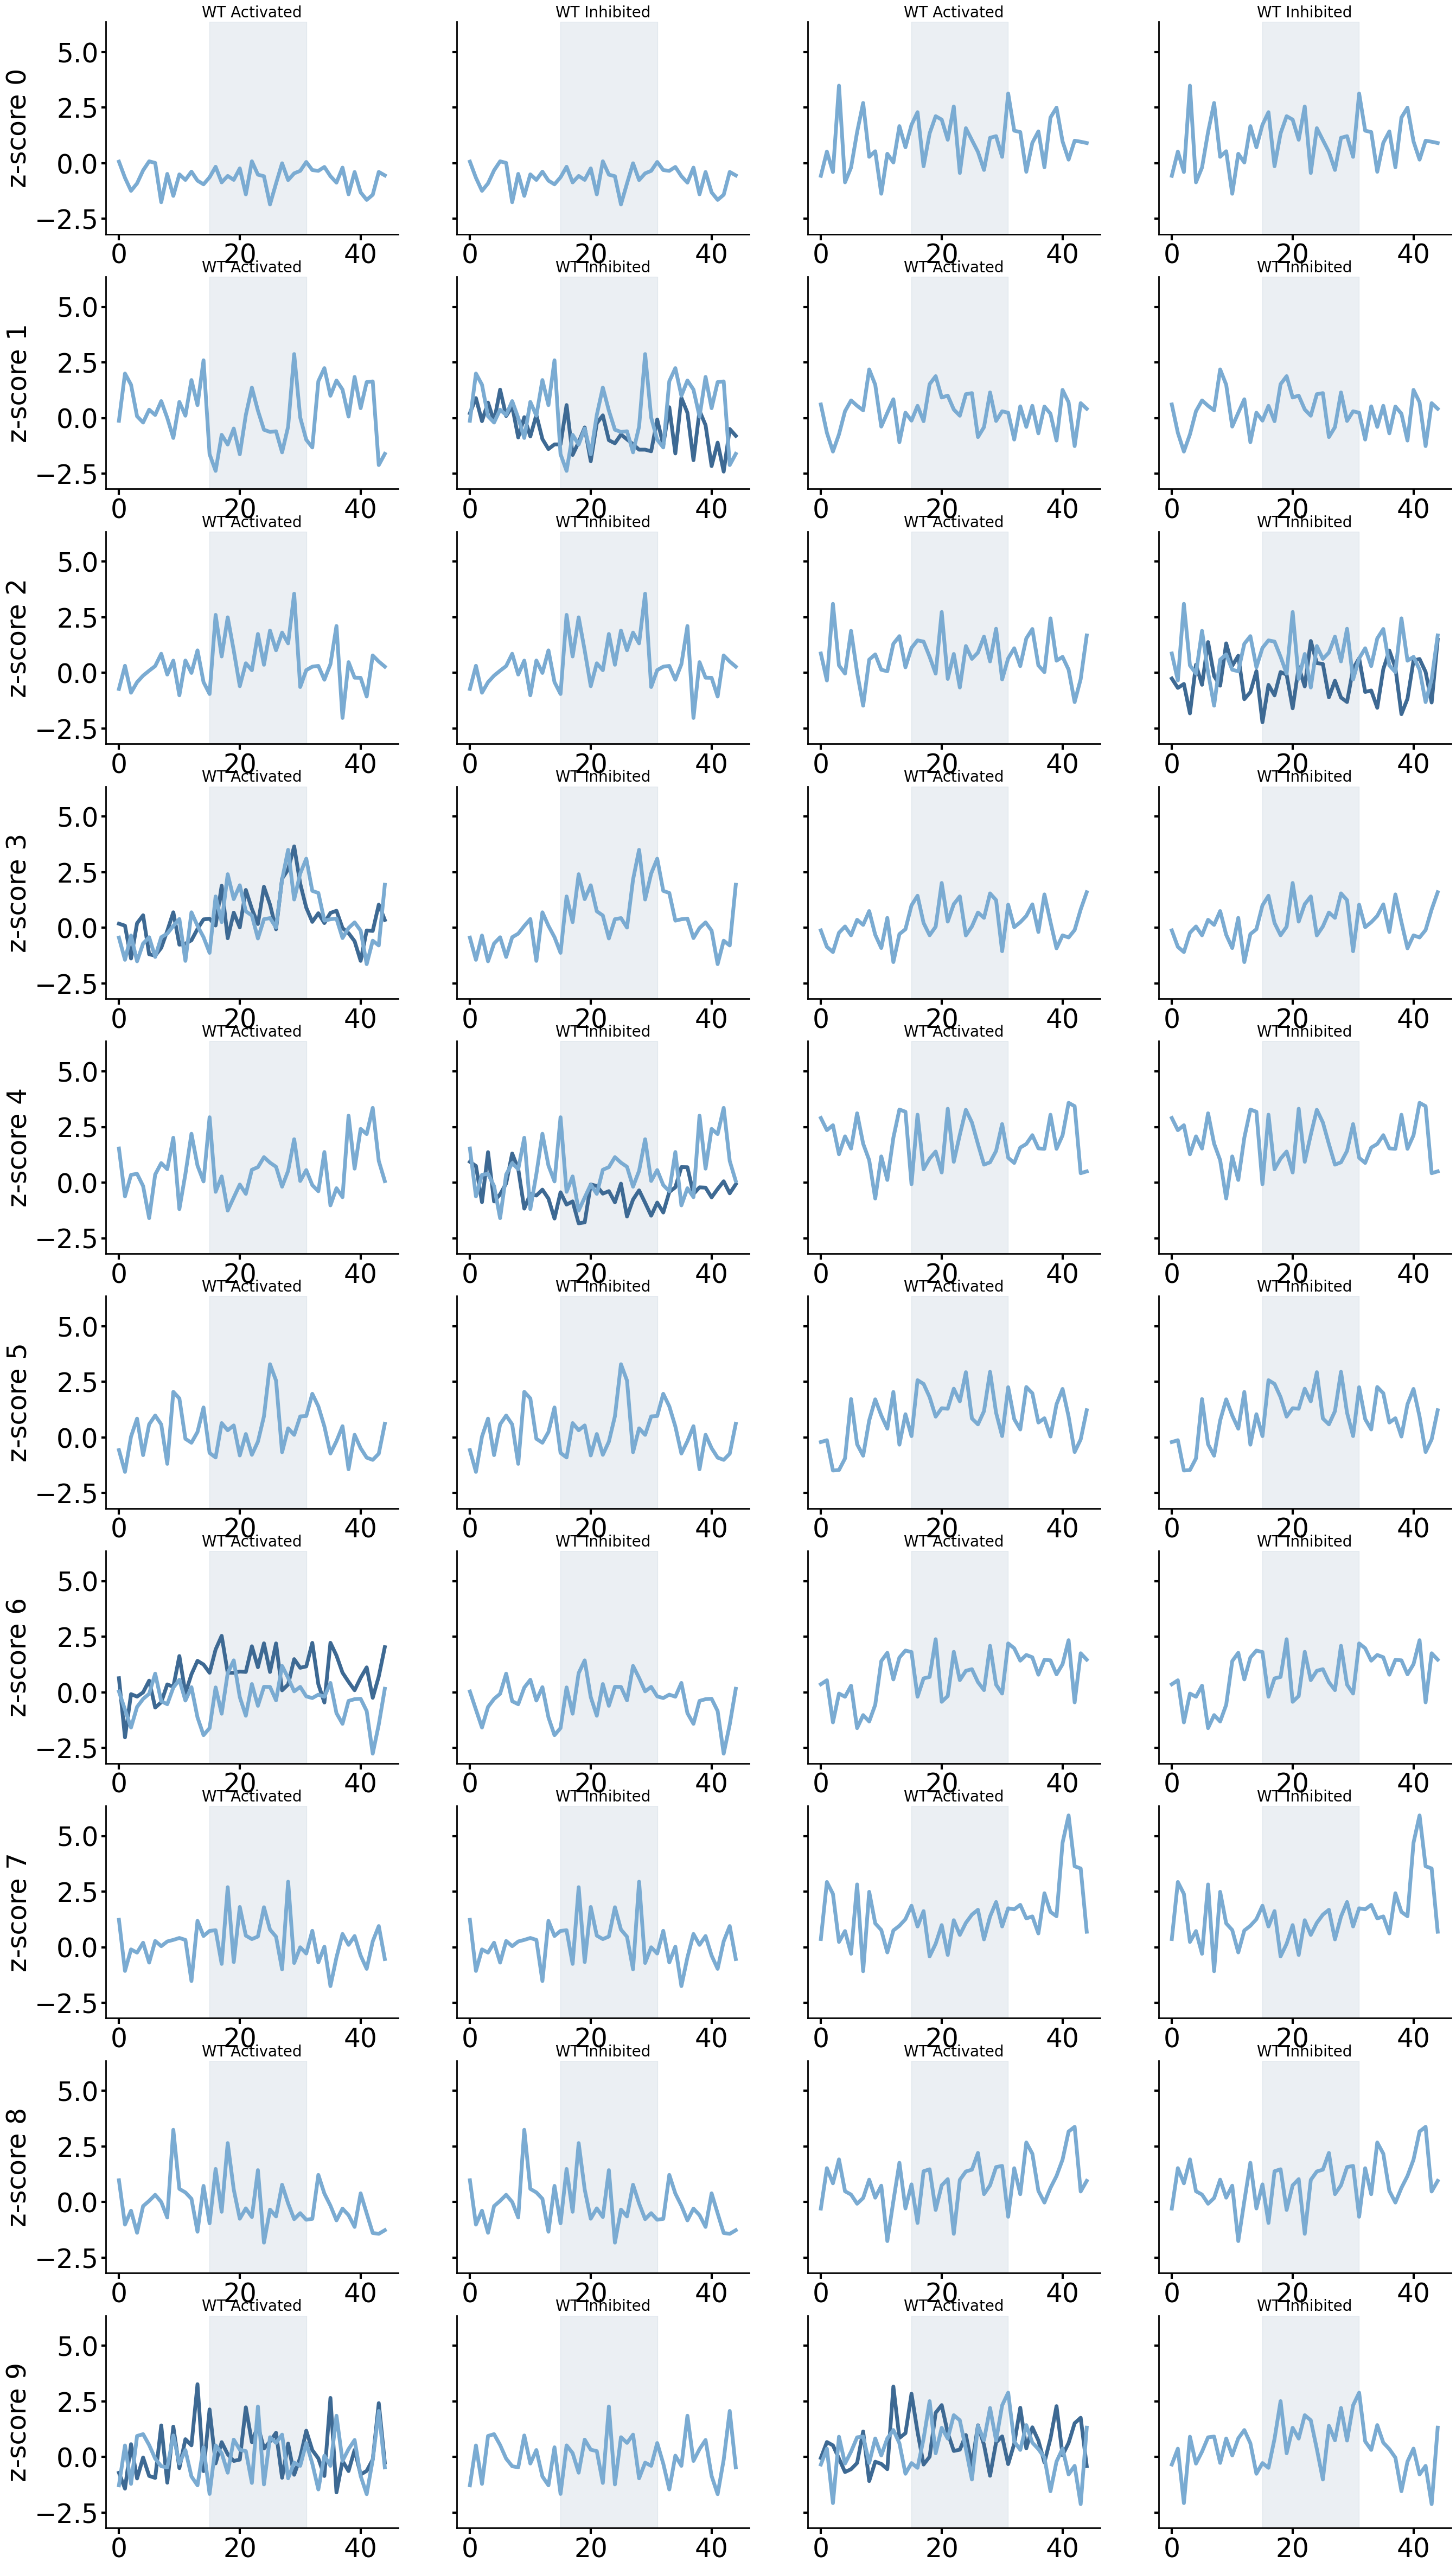

In [3]:
neurons = 10
trial = 3
rec = recs[5879] #WT
# rec = recs[5890] #KO
color = ("#3d6993", "#7aabd2") #WT
# color = ("firebrick", "#e18282") #KO

fig, ax = plt.subplots(nrows=neurons, ncols=4, sharex=False, sharey=True, figsize=(32, 6*neurons))

for neuron in range(10):
    for j, type, zscore in zip((0, 1), ("EXC", "INH"), (np.array(rec.zscore_exc), np.array(rec.zscore_inh))):
        resp_mat_det = rec.matrices[type]["Responsivity"][:, rec.detected_stim]
        resp_mat_undet = rec.matrices[type]["Responsivity"][:, ~rec.detected_stim]

        resp_mat_det = np.repeat(resp_mat_det[:, :, np.newaxis], 45, axis=2)
        resp_mat_undet = np.repeat(resp_mat_undet[:, :, np.newaxis], 45, axis=2)

        det_times = np.array(rec.stim_time)[rec.detected_stim]
        undet_times = np.array(rec.stim_time)[np.invert(rec.detected_stim)]

        zscore_det = zscore[:, np.linspace(det_times - int(0.5 * rec.sf), det_times + 2 * int(0.5 * rec.sf), 3 * int(0.5 * rec.sf), dtype=int)]
        zscore_det = np.swapaxes(zscore_det, 1, 2)
        zscore_det_act = np.where(resp_mat_det == 1, zscore_det, np.nan)
        zscore_det_inh = np.where(resp_mat_det == -1, zscore_det, np.nan)

        zscore_undet = zscore[:, np.linspace(undet_times - int(0.5 * rec.sf), undet_times + 2 * int(0.5 * rec.sf), 3 * int(0.5 * rec.sf), dtype=int)]
        zscore_undet = np.swapaxes(zscore_undet, 1, 2)
        zscore_undet_act = np.where(resp_mat_undet == 1, zscore_undet, np.nan)
        zscore_undet_inh = np.where(resp_mat_undet == -1, zscore_undet, np.nan)

        trial_avg_det = np.mean(zscore_det, axis=1)
        trial_avg_undet = np.mean(zscore_undet, axis=1)

        all_avg_det = np.mean(trial_avg_det, axis=0)
        all_avg_undet = np.mean(trial_avg_undet, axis=0)

        ax[neuron, 0 + 2*j].plot(np.arange(0, 45, 1), zscore_det_act[neuron, trial], c=color[0])
        ax[neuron, 0 + 2*j].plot(np.arange(0, 45, 1), zscore_undet[neuron, trial], c=color[1])
        ax[neuron, 0 + 2*j].axvspan(15, 31, color=color[0], alpha=0.1)
        ax[neuron, 0 + 2*j].set_title(f"{rec.genotype} Activated")
        ax[neuron, 0 + 2*j].spines[["right", "top"]].set_visible(False)

        ax[neuron, 1 + 2*j].plot(np.arange(0, 45, 1), zscore_det_inh[neuron, trial], c=color[0])
        ax[neuron, 1 + 2*j].plot(np.arange(0, 45, 1), zscore_undet[neuron, trial], c=color[1])
        ax[neuron, 1 + 2*j].axvspan(15, 31, color=color[0], alpha=0.1)
        ax[neuron, 1 + 2*j].set_title(f"{rec.genotype} Inhibited")
        ax[neuron, 1 + 2*j].spines[["right", "top"]].set_visible(False)

    ax[neuron, 0].set_ylabel(f"z-score {neuron}")
plt.show()

4445
4456
4745
4756
4754
4939
5890
5886
5896
5893
5879
5889
5873
5881
6606
6601
6609
6611


C:\Users\cvandromme\AppData\Local\Temp\ipykernel_26396\3317854640.py:46: RuntimeWarning: Mean of empty slice
  trial_avg_act_det = np.nanmean(zscore_det_act, axis=1)
C:\Users\cvandromme\AppData\Local\Temp\ipykernel_26396\3317854640.py:47: RuntimeWarning: Mean of empty slice
  trial_avg_act_undet = np.nanmean(zscore_undet_act, axis=1)
C:\Users\cvandromme\AppData\Local\Temp\ipykernel_26396\3317854640.py:48: RuntimeWarning: Mean of empty slice
  trial_avg_inh_det = np.nanmean(zscore_det_inh, axis=1)
C:\Users\cvandromme\AppData\Local\Temp\ipykernel_26396\3317854640.py:49: RuntimeWarning: Mean of empty slice
  trial_avg_inh_undet = np.nanmean(zscore_undet_inh, axis=1)
C:\Users\cvandromme\AppData\Local\Temp\ipykernel_26396\3317854640.py:52: RuntimeWarning: Mean of empty slice
  all_avg_inh_det = np.nanmean(trial_avg_inh_det, axis=0)
C:\Users\cvandromme\AppData\Local\Temp\ipykernel_26396\3317854640.py:54: RuntimeWarning: Mean of empty slice
  all_avg_inh_undet = np.nanmean(trial_avg_inh_undet

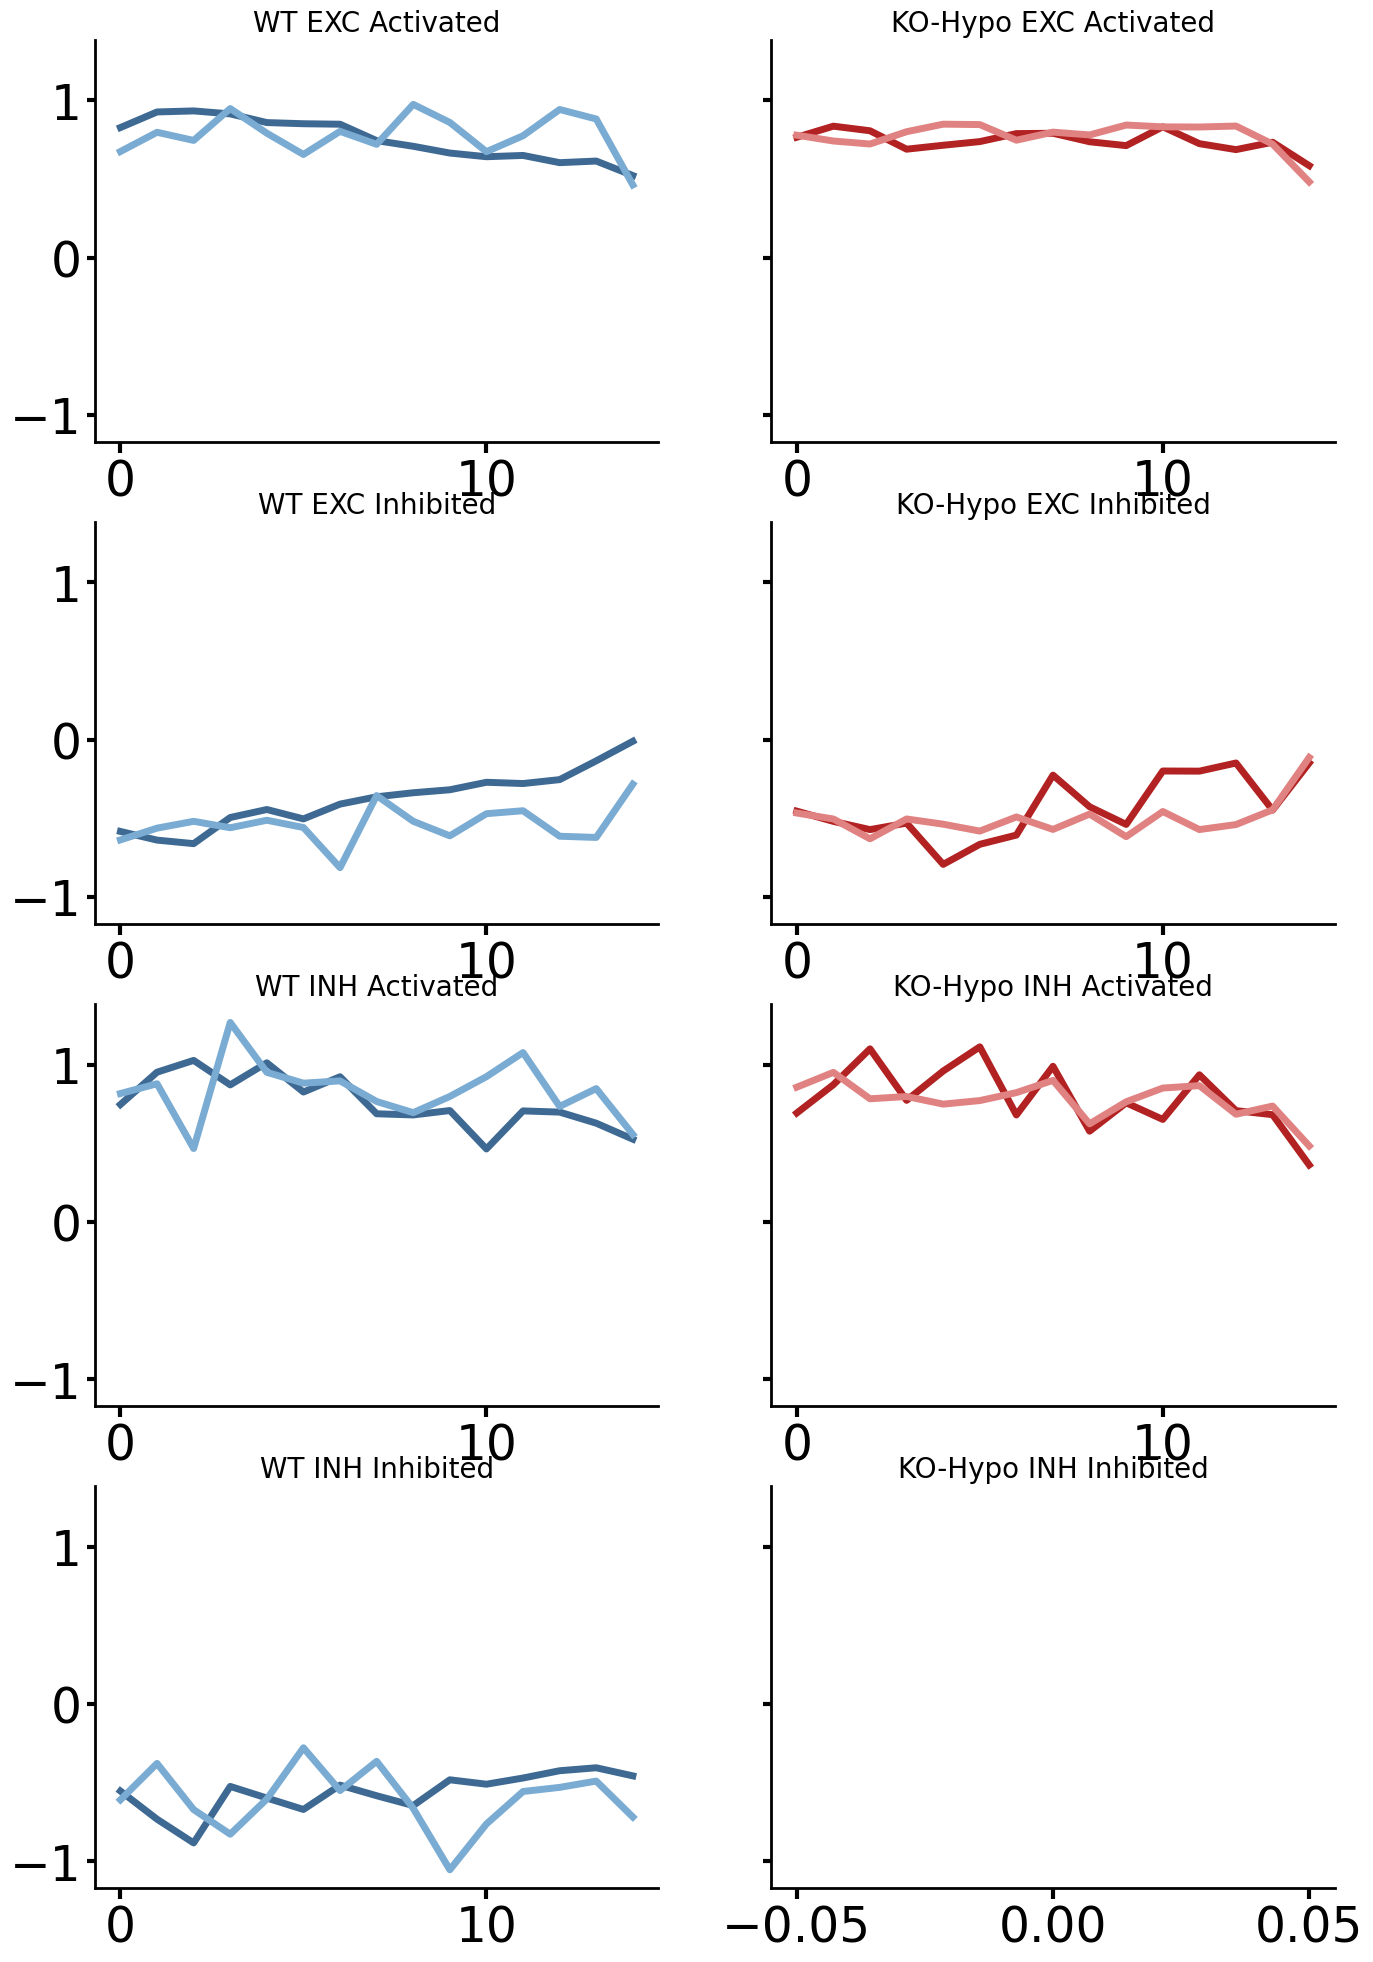

In [4]:
color_dict = {"WT" : ("#3d6993", "#7aabd2"),
              "KO-Hypo": ("firebrick", "#e18282")}

fig, ax = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=True, figsize=(16, 24))

wt_exc_act_det = np.empty((0, 15))
wt_exc_act_undet = np.empty((0, 15))
wt_inh_act_det = np.empty((0, 15))
wt_inh_act_undet = np.empty((0, 15))
ko_exc_act_det = np.empty((0, 15))
ko_exc_act_undet = np.empty((0, 15))
ko_inh_act_det = np.empty((0, 15))
ko_inh_act_undet = np.empty((0, 15))
wt_exc_inh_det = np.empty((0, 15))
wt_exc_inh_undet = np.empty((0, 15))
wt_inh_inh_det = np.empty((0, 15))
wt_inh_inh_undet = np.empty((0, 15))
ko_exc_inh_det = np.empty((0, 15))
ko_exc_inh_undet = np.empty((0, 15))
ko_inh_inh_det = np.empty((0, 15))
ko_inh_inh_undet = np.empty((0, 15))

for rec in recs.values():
    print(rec.filename)
    for type, zscore in zip(("EXC", "INH"), (np.array(rec.zscore_exc), np.array(rec.zscore_inh))):
        # Creating a responsivity filtered responsivity matrix stacked 15 times
        resp_mat_det = rec.matrices[type]["Responsivity"][:, rec.detected_stim]
        resp_mat_undet = rec.matrices[type]["Responsivity"][:, ~rec.detected_stim]
        resp_mat_det = np.repeat(resp_mat_det[:, :, np.newaxis], 15, axis=2)
        resp_mat_undet = np.repeat(resp_mat_undet[:, :, np.newaxis], 15, axis=2)

        # Retrieving the times adn zscore values of detected and undetected trials
        det_times = np.array(rec.stim_time)[rec.detected_stim]
        undet_times = np.array(rec.stim_time)[np.invert(rec.detected_stim)]

        zscore_det = zscore[:, np.linspace(det_times, det_times + int(0.5 * rec.sf), int(0.5 * rec.sf), dtype=int)]
        zscore_det = np.swapaxes(zscore_det, 1, 2)
        zscore_det_act = np.where(resp_mat_det == 1, zscore_det, np.nan)
        zscore_det_inh = np.where(resp_mat_det == -1, zscore_det, np.nan)

        zscore_undet = zscore[:, np.linspace(undet_times, undet_times + int(0.5 * rec.sf), int(0.5 * rec.sf), dtype=int)]
        zscore_undet = np.swapaxes(zscore_undet, 1, 2)
        zscore_undet_act = np.where(resp_mat_undet == 1, zscore_undet, np.nan)
        zscore_undet_inh = np.where(resp_mat_undet == -1, zscore_undet, np.nan)

        trial_avg_act_det = np.nanmean(zscore_det_act, axis=1)
        trial_avg_act_undet = np.nanmean(zscore_undet_act, axis=1)
        trial_avg_inh_det = np.nanmean(zscore_det_inh, axis=1)
        trial_avg_inh_undet = np.nanmean(zscore_undet_inh, axis=1)

        all_avg_act_det = np.nanmean(trial_avg_act_det, axis=0)
        all_avg_inh_det = np.nanmean(trial_avg_inh_det, axis=0)
        all_avg_act_undet = np.nanmean(trial_avg_act_undet, axis=0)
        all_avg_inh_undet = np.nanmean(trial_avg_inh_undet, axis=0)

        if rec.genotype == "WT":
            if type == "EXC":
                wt_exc_act_det = np.row_stack((wt_exc_act_det, all_avg_act_det))
                wt_exc_act_undet = np.row_stack((wt_exc_act_undet, all_avg_act_undet))
                wt_exc_inh_det = np.row_stack((wt_exc_inh_det, all_avg_inh_det))
                wt_exc_inh_undet = np.row_stack((wt_exc_inh_undet, all_avg_inh_undet))
            else:
                wt_inh_act_det = np.row_stack((wt_inh_act_det, all_avg_act_det))
                wt_inh_act_undet = np.row_stack((wt_inh_act_undet, all_avg_act_undet))
                wt_inh_inh_det = np.row_stack((wt_inh_inh_det, all_avg_inh_det))
                wt_inh_inh_undet = np.row_stack((wt_inh_inh_undet, all_avg_inh_undet))
        elif rec.genotype == "KO-Hypo":
            if type == "EXC":
                ko_exc_act_det = np.row_stack((ko_exc_act_det, all_avg_act_det))
                ko_exc_act_undet = np.row_stack((ko_exc_act_undet, all_avg_act_undet))
                ko_exc_inh_det = np.row_stack((ko_exc_inh_det, all_avg_inh_det))
                ko_exc_inh_undet = np.row_stack((ko_exc_inh_undet, all_avg_inh_undet))
            else:
                ko_inh_act_det = np.row_stack((ko_inh_act_det, all_avg_act_det))
                ko_inh_act_undet = np.row_stack((ko_inh_act_undet, all_avg_act_undet))
                ko_inh_inh_det = np.row_stack((ko_inh_inh_det, all_avg_inh_det))
                ko_inh_inh_undet = np.row_stack((ko_inh_inh_undet, all_avg_inh_undet))

avg_wt_exc_act_det = np.mean(wt_exc_act_det, axis=0)
avg_wt_exc_act_undet = np.mean(wt_exc_act_undet, axis=0)
avg_wt_inh_act_det = np.mean(wt_inh_act_det, axis=0)
avg_wt_inh_act_undet = np.mean(wt_inh_act_undet, axis=0)
avg_ko_exc_act_det = np.mean(ko_exc_act_det, axis=0)
avg_ko_exc_act_undet = np.mean(ko_exc_act_undet, axis=0)
avg_ko_inh_act_det = np.mean(ko_inh_act_det, axis=0)
avg_ko_inh_act_undet = np.mean(ko_inh_act_undet, axis=0)

avg_wt_exc_inh_det = np.mean(wt_exc_inh_det, axis=0)
avg_wt_exc_inh_undet = np.mean(wt_exc_inh_undet, axis=0)
avg_wt_inh_inh_det = np.mean(wt_inh_inh_det, axis=0)
avg_wt_inh_inh_undet = np.mean(wt_inh_inh_undet, axis=0)
avg_ko_exc_inh_det = np.mean(ko_exc_inh_det, axis=0)
avg_ko_exc_inh_undet = np.mean(ko_exc_inh_undet, axis=0)
avg_ko_inh_inh_det = np.mean(ko_inh_inh_det, axis=0)
avg_ko_inh_inh_undet = np.mean(ko_inh_inh_undet, axis=0)

ax[0, 0].plot(np.arange(0, 15, 1), avg_wt_exc_act_det, c="#3d6993") #WT EXC ACT
ax[0, 0].plot(np.arange(0, 15, 1), avg_wt_exc_act_undet, c="#7aabd2")
ax[0, 1].plot(np.arange(0, 15, 1), avg_ko_exc_act_det, c="firebrick") #KO EXC ACT
ax[0, 1].plot(np.arange(0, 15, 1), avg_ko_exc_act_undet, c="#e18282")
ax[0, 0].set_title("WT EXC Activated")
ax[0, 1].set_title("KO-Hypo EXC Activated")

ax[1, 0].plot(np.arange(0, 15, 1), avg_wt_exc_inh_det, c="#3d6993") #WT EXC INH
ax[1, 0].plot(np.arange(0, 15, 1), avg_wt_exc_inh_undet, c="#7aabd2")
ax[1, 1].plot(np.arange(0, 15, 1), avg_ko_exc_inh_det, c="firebrick") #KO EXC INH
ax[1, 1].plot(np.arange(0, 15, 1), avg_ko_exc_inh_undet, c="#e18282")
ax[1, 0].set_title("WT EXC Inhibited")
ax[1, 1].set_title("KO-Hypo EXC Inhibited")

ax[2, 0].plot(np.arange(0, 15, 1), avg_wt_inh_act_det, c="#3d6993") #WT INH ACT
ax[2, 0].plot(np.arange(0, 15, 1), avg_wt_inh_act_undet, c="#7aabd2")
ax[2, 1].plot(np.arange(0, 15, 1), avg_ko_inh_act_det, c="firebrick") #KO INH ACT
ax[2, 1].plot(np.arange(0, 15, 1), avg_ko_inh_act_undet, c="#e18282")
ax[2, 0].set_title("WT INH Activated")
ax[2, 1].set_title("KO-Hypo INH Activated")

ax[3, 0].plot(np.arange(0, 15, 1), avg_wt_inh_inh_det, c="#3d6993") #WT INH INH
ax[3, 0].plot(np.arange(0, 15, 1), avg_wt_inh_inh_undet, c="#7aabd2")
ax[3, 1].plot(np.arange(0, 15, 1), avg_ko_inh_inh_det, c="firebrick") #KO INH INH
ax[3, 1].plot(np.arange(0, 15, 1), avg_ko_inh_inh_undet, c="#e18282")
ax[3, 0].set_title("WT INH Inhibited")
ax[3, 1].set_title("KO-Hypo INH Inhibited")

for i in (0, 1, 2, 3):
    for j in (0, 1):
        ax[i, j].spines[["right", "top"]].set_visible(False)

plt.show()